#Winner takes all network example


[[ 7.39216217  3.00038853]
 [ 0.97756972  4.99156246]
 [ 5.20865322  4.04032975]
 [ 2.27547398  4.75257729]
 [ 3.45569414  4.83537418]
 [ 3.78936396  4.07373122]
 [ 0.32452113  1.09643167]
 [ 0.10888552  0.14231828]
 [ 0.13530273  1.57561152]
 [ 0.90327415 -0.1678113 ]
 [ 7.20795529  3.05222043]
 [ 2.69194647  5.21865918]
 [ 4.06534341  4.37430114]
 [ 1.95547895  4.49260994]
 [ 1.06379035  0.50205391]
 [ 1.42035812  5.52545302]
 [ 0.78635819  0.97248705]
 [ 2.38397158  5.27591684]
 [ 4.1270354   4.60004423]
 [ 7.22424592  3.66075737]
 [ 6.79814193  3.23729679]
 [ 0.92686184  1.17713126]
 [ 4.3603744   3.61323503]
 [ 2.04796388  0.33757009]
 [ 3.73903744  3.75286159]
 [ 2.08104527  5.44882943]
 [ 5.00925815  3.81273066]
 [ 7.18195544  3.54407026]
 [ 4.28495503  4.12248417]
 [ 2.04090983  4.99654167]
 [ 3.73466427  4.60964707]
 [ 6.76439612  3.74149944]
 [ 2.1996481   5.24363465]
 [ 8.17687699  3.08998364]
 [ 7.49541343  3.61120145]
 [ 2.3869233   4.42908699]
 [ 0.94010386  0.94728879]
 

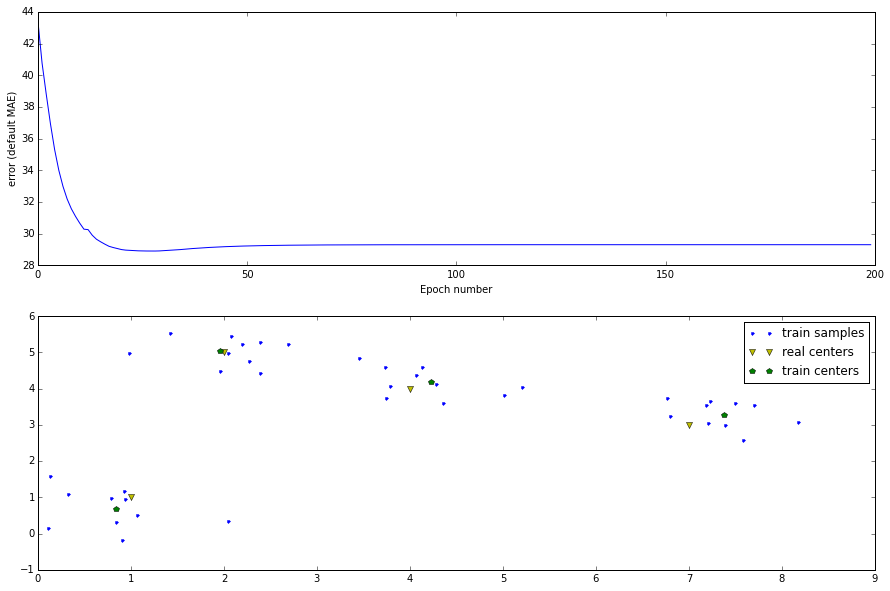

In [4]:
import numpy as np
import neurolab as nl
import numpy.random as rand
import pylab as pl
%matplotlib inline

# Create a data set with four groups centered around centr----------------------
# Create array with four 2-D points
centr = np.array([[1, 1], [4, 4], [7, 3], [2, 5]])
# Create four sets of random normal distributed data 2-D points 
# with spaced 0.5 of size N each
N = 10
rand_norm = 0.5 * rand.randn(N, 4, 2)

# Add random points around the centers
inp = np.array([centr + r for r in rand_norm])

# Re-adjust array shape
inp.shape = (N * 4, 2)
rand.shuffle(inp) 
print(inp)

# Create net with 2 inputs and 4 neurons----------------------------------------
net = nl.net.newc([[0.0, 1.0],[0.0, 1.0]], 4)
# train with rule: Conscience Winner Take All algoritm (CWTA)
error = net.train(inp, epochs=200, show=20)

# Plot results------------------------------------------------------------------
pl.figure(figsize=(15, 10))
pl.title('Classification Problem')
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('error (default MAE)')
w = net.layers[0].np['w']
print("weights",  w)

pl.subplot(212)
pl.plot(inp[:,0], inp[:,1], '.', \
        centr[:,0], centr[:, 1] , 'yv', \
        w[:,0], w[:,1], 'p')
pl.legend(['train samples', 'real centers', 'train centers'])
pl.show()

8
8
[ 0.83639489  0.66624483]


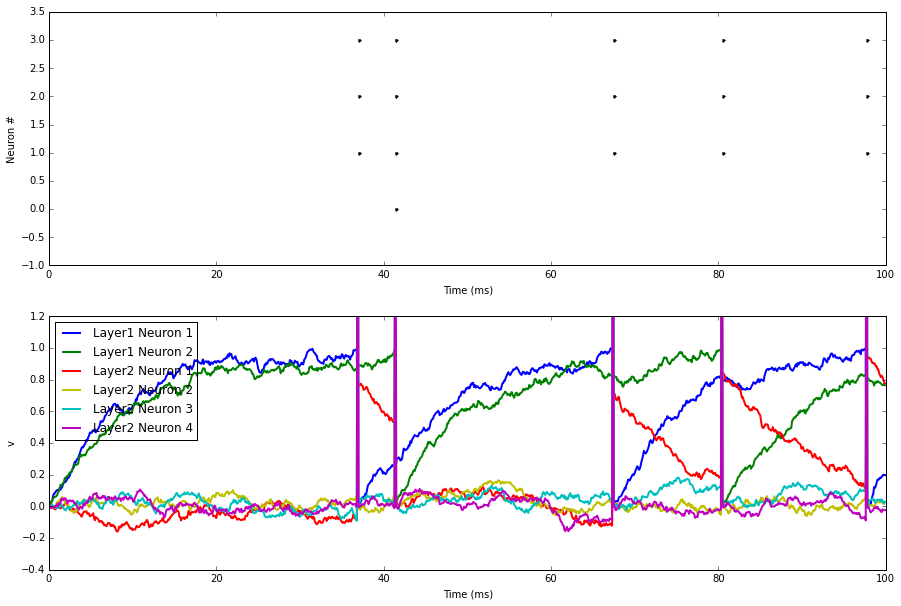

In [5]:
from brian2 import *
#%matplotlib inline

start_scope()
tau = 10*ms
sigma = 0.1

# simga * xi defines the stochasticity 
# *tau**-0.5 is needed for keeping the units correct 
eqs = '''
dv/dt = (I-v)/tau+sigma*xi*tau**-0.5  : 1
I : 1
'''

Layer1 = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0')
Layer1.I = [1, 1] # 2 # for all the same input
Layer2 = NeuronGroup(4, eqs, threshold='v>1', reset='v = 0')
Layer2.I = [0, 0, 0, 0] # 
#G.tau = [10, 100, 100, 10]*ms

# Add synapses
we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
wi = (-20*4.5/10)*mV # inhibitory synaptic weight
#S = Synapses(Layer1, Layer2, 'w : 1', pre='ge += we')
#S2 = Synapses(Layer2, Layer2, 'w : 1', pre='gi += wi')
S = Synapses(Layer1, Layer2, 'w : 1', pre='v_post += w')
S2 = Synapses(Layer2, Layer2, 'w : 1', pre='v_post += w')
S.connect(0, [0, 1, 2, 3])
S.connect(1, [0, 1, 2, 3])
S2.connect(0,[0,1,2,3])
S2.connect(1,[0,1,2,3])
S2.connect(2,[0,1,2,3])
S2.connect(3,[0,1,2,3])

print(size(S.w))
print(size(w))
#S2.w = [-10]*16

#Connect neuron 1 to all the neurons of layer 2
print(w[0])
S.w[0,0]=w[0][0]
S.w[0,1]=w[1][0]
S.w[0,2]=w[2][0]
S.w[0,3]=w[3][0]

#Connect neuron 1 to all the neurons of layer 2
S.w[1,0]=w[0][1]
S.w[1,1]=w[1][1]
S.w[1,2]=w[2][1]
S.w[1,3]=w[3][1]

M1 = StateMonitor(Layer1, 'v', record=True)
M2 = StateMonitor(Layer2, 'v', record=True)
spikemon = SpikeMonitor(S)

runtime = 100
run(runtime*ms)

# Plot the spike times in a raster plot
figure(figsize=(15, 10))
subplot(211)
plot(spikemon.t/ms, spikemon.i, '.k')
axis([0, runtime, -1, 3.5])
xlabel('Time (ms)')
ylabel('Neuron #')

# Plot the voltage of all neurons along time
subplot(212)
plot(M1.t/ms, M1.v[0], '-b', lw=2, label='Layer1 Neuron 1')
plot(M1.t/ms, M1.v[1], '-g', lw=2, label='Layer1 Neuron 2')

plot(M2.t/ms, M2.v[0], '-r', lw=2, label='Layer2 Neuron 1')
plot(M2.t/ms, M2.v[1], '-y', lw=2, label='Layer2 Neuron 2')
plot(M2.t/ms, M2.v[2], '-c', lw=2, label='Layer2 Neuron 3')
plot(M2.t/ms, M2.v[3], '-m', lw=2, label='Layer2 Neuron 4')
axis([0, runtime, -0.4, 1.2])
xlabel('Time (ms)')
ylabel('v')
legend(loc='best')

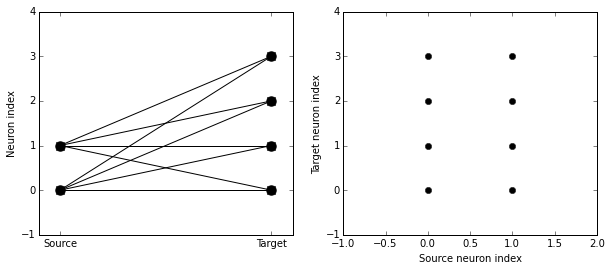

In [6]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')
    
visualise_connectivity(S)